In [2]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=9f1a8a04fe9416921636e0eeb5d2ecf90bcb7774e04d9b9f53b0f196865dbe4c
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


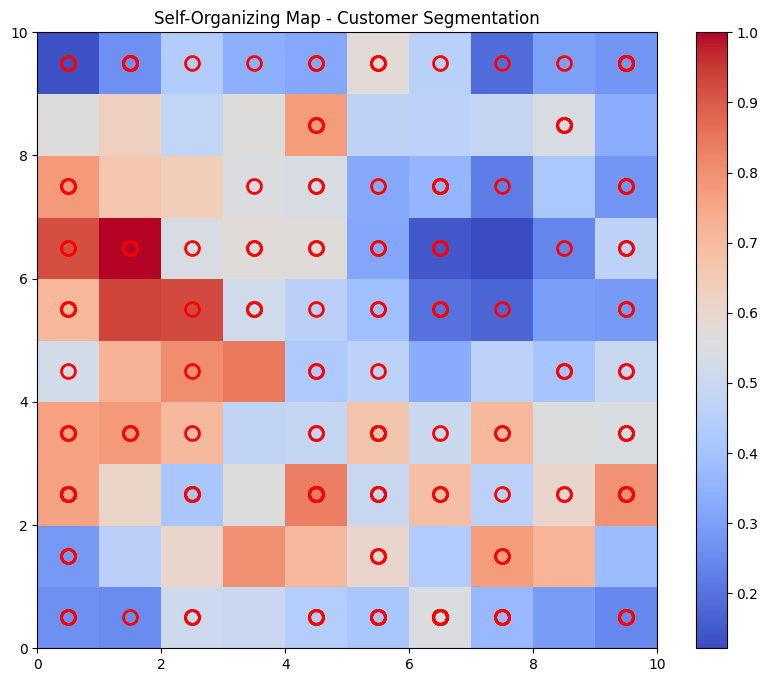

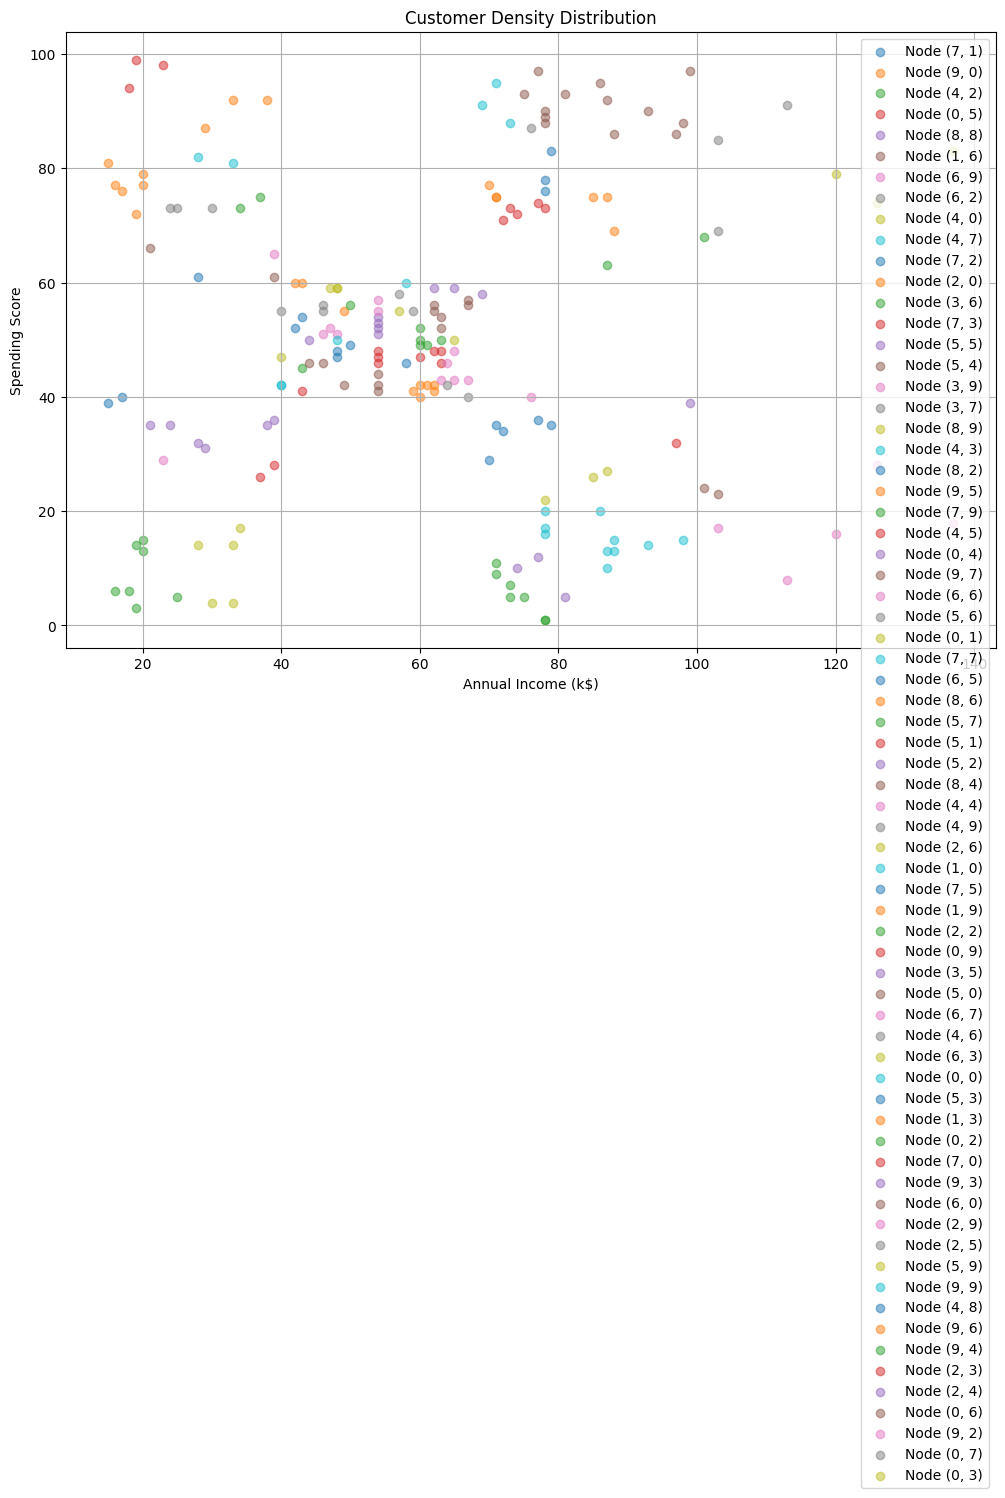

Node (7, 1):
 - Average Income: $16.00k
 - Average Spending Score: 39.50
 - Average Age: 25.00 years
 - Number of Customers: 2

Node (9, 0):
 - Average Income: $17.83k
 - Average Spending Score: 77.00
 - Average Age: 23.67 years
 - Number of Customers: 6

Node (4, 2):
 - Average Income: $19.57k
 - Average Spending Score: 8.86
 - Average Age: 46.71 years
 - Number of Customers: 7

Node (0, 5):
 - Average Income: $20.00k
 - Average Spending Score: 97.00
 - Average Age: 31.00 years
 - Number of Customers: 3

Node (8, 8):
 - Average Income: $25.50k
 - Average Spending Score: 33.25
 - Average Age: 38.75 years
 - Number of Customers: 4

Node (1, 6):
 - Average Income: $21.00k
 - Average Spending Score: 66.00
 - Average Age: 20.00 years
 - Number of Customers: 1

Node (6, 9):
 - Average Income: $23.00k
 - Average Spending Score: 29.00
 - Average Age: 52.00 years
 - Number of Customers: 1

Node (6, 2):
 - Average Income: $26.33k
 - Average Spending Score: 73.00
 - Average Age: 25.67 years
 - N

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom


dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values  # Using Annual Income and Spending Score
y = dataset.iloc[:, 2].values  # Using Age


sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)


som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)


som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)


mappings = som.win_map(X)


plt.figure(figsize=(10, 8))
plt.title('Self-Organizing Map - Customer Segmentation')
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Plot the distance map
plt.colorbar()


for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5,
             w[1] + 0.5,
             'o',
             markeredgecolor='r',
             markerfacecolor='None',
             markersize=10,
             markeredgewidth=2)

plt.show()


plt.figure(figsize=(12, 8))
for node, customers in mappings.items():
    if len(customers) > 0:
        customers_original_scale = sc.inverse_transform(customers)

        plt.scatter(customers_original_scale[:, 0], customers_original_scale[:, 1],
                    label=f'Node {node}', alpha=0.5)

plt.title('Customer Density Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


cluster_characteristics = {}

for node, customers in mappings.items():
    if len(customers) > 0:
        customer_indices = [np.where(np.all(X == customer, axis=1))[0][0] for customer in customers]

        customers_original_scale = sc.inverse_transform(customers)
        cluster_df = pd.DataFrame(customers_original_scale, columns=['Annual Income (k$)', 'Spending Score'])
        cluster_df['Age'] = y[customer_indices]


        avg_income = cluster_df['Annual Income (k$)'].mean()
        avg_spending = cluster_df['Spending Score'].mean()
        avg_age = cluster_df['Age'].mean()

        cluster_characteristics[node] = {
            'Average Income': avg_income,
            'Average Spending Score': avg_spending,
            'Average Age': avg_age,
            'Number of Customers': len(customers)
        }


for node, characteristics in cluster_characteristics.items():
    print(f'Node {node}:')
    print(f" - Average Income: ${characteristics['Average Income']:.2f}k")
    print(f" - Average Spending Score: {characteristics['Average Spending Score']:.2f}")
    print(f" - Average Age: {characteristics['Average Age']:.2f} years")
    print(f" - Number of Customers: {characteristics['Number of Customers']}\n")
